In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import ast

In [17]:
iteration_number = 1
folder_path = f"EE-GACalifornia/Iteration_{iteration_number}"

In [19]:
def getFitnessValues(folder_path):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    txt_files = [f for f in files if f.endswith('.txt')]
    fileNumber = len(txt_files)
    
    lowest_fitness_values = []
    highest_fitness_values = []
    average_fitness_values = []
    fitness_value = []
    
    for i in range(1, fileNumber + 1):
        
            with open(f'{folder_path}/Gen_{i}.txt', 'r') as file:
                lines = file.readlines()
            
                for line in lines:
                    if 'Lowest Fitness' in line:
                        # Extract the value after the keyword, assuming it's space-separated
                        try:
                            # Extract the number from the line
                            fitness_value = float(line.split()[-1])
                            lowest_fitness_values.append(fitness_value)
                        except ValueError:
                            print(f"Could not convert fitness value to float: {line}")
                            print("None")
                    elif 'Highest Fitness' in line:
                        # Extract the value after the keyword, assuming it's space-separated
                        try:
                            # Extract the number from the line
                            fitness_value = float(line.split()[-1])
                            highest_fitness_values.append(fitness_value)
                        except ValueError:
                            print(f"Could not convert fitness value to float: {line}")
                            print("None")
    
                    elif 'Average Fitness' in line:
                        # Extract the value after the keyword, assuming it's space-separated
                        try:
                            # Extract the number from the line
                            fitness_value = float(line.split()[-1])
                            average_fitness_values.append(fitness_value)
                        except ValueError:
                            print(f"Could not convert fitness value to float: {line}")
                            print("None")
    
                    elif 'Generation Data' in line:
                        # Extract the fitness values from the data
                        generation_data_text = line.replace("Generation Data: ", "").replace("np.float64", "") 
                        
                        generation_data = ast.literal_eval(generation_data_text)
    
                        # Access the fitness value of each entry, which is at the 3rd index from the end (-3)
                        fitness_values[i] = [entry[-3] for entry in generation_data]

    return lowest_fitness_values, highest_fitness_values, average_fitness_values, fitness_values

In [21]:
lowest_fitness_values, highest_fitness_values, average_fitness_values, fitness_values = getFitnessValues(folder_path)

In [111]:
def drawGraph(fitness_values, save_path):
    # Define positions for each generation's box plot
    positions = list(range(1, (len(fitness_values) + 1)))

    fig, ax = plt.subplots()
    
    ax.boxplot(fitness_values, positions=positions, widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

    # Adjust xlim to ensure box plots are properly displayed
    ax.set(xlim=(0.5, len(fitness_values) + 0.5), xticks=np.arange(1, len(fitness_values) + 1),
           ylim=(0.4, 0.8), yticks=np.arange(0.4, 0.9, 0.05))

    ax.set_xlabel("Generation")
    ax.set_ylabel("Fitness Value")
    ax.set_title(f"Fitness Progression for Iteration {iteration_number}")

    fig.savefig(save_path)
    plt.show()

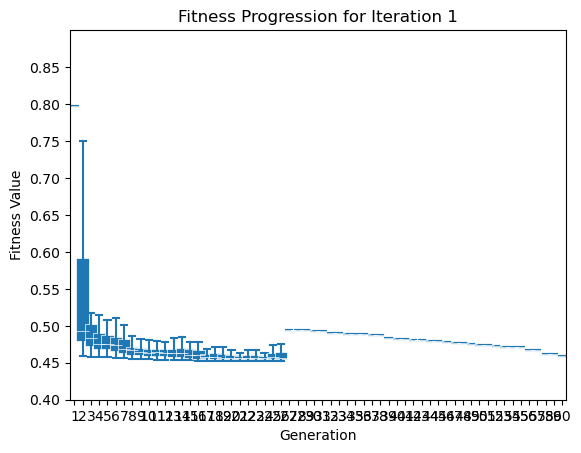

In [113]:
drawGraph(fitness_values=fitness_values, save_path=f"{folder_path}/Temp.png")